## The topic of this class are dense objects

In [13]:
from astropy import units as u
from astropy import constants as c

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import numpy as np

### TASK 1: Schwarzschild radius

#### 1a: let's derive Schwarzschild radius equation

#### 1b: create a Schwarzschild radius function (using astropy units and constats)

In [33]:
def schwartz(mass_sun):
    M = mass_sun*2e30*u.kg
    return (2*c.G*M/(c.c**2)).to(u.m)

schwartz(1)

<Quantity 2970.46410765 m>

#### 1c: create a density function

In [45]:
# density = Mass / 4 pi R ^ 3

def density(mass_sun):
    radius = schwartz(mass_sun)
    M = mass_sun*2e30*u.kg
    return (M/(4*np.pi*(radius**3)/3)).to(u.kg/(u.m**3))

density(1)

<Quantity 1.82166477e+19 kg / m3>

#### 1d: assuming SgrA* is a non-rotating black hole, what would be its radius? and density?

In [47]:
mass_SGR = 4.3e6

density(mass_SGR) #really dense guy XD

<Quantity 985216.20781093 kg / m3>

In [49]:
schwartz(mass_SGR).to(u.AU)

<Quantity 0.0853822 AU>

#### 1e: how much mass would a ping-pong ball sized non-rotating bh have? what would be its density? are there objects like this in the Universe?

In [57]:
size = 2.5*u.cm

def mass_BH(radii):
    r = radii.to(u.m)
#     return r
    return ((c.c**2)*r/(2*c.G)) 

mass_BH(size)

<Quantity 1.68323865e+25 kg>

In [59]:
mass = mass_BH(size)
mass_in_suns = mass.value / 2e30

density(mass_in_suns)

<Quantity 2.57179922e+29 kg / m3>

In [60]:
# there are no such objects, according to the studies of Hawking, as such small BHs are unstable and evaporate quickly, though maybe we have not find them yet XD

### TASK 2: What is the Schwarzschild radius of TON 618? Plot how Schwarzschild radius changes with mass (place SgrA* and TON618 as references).

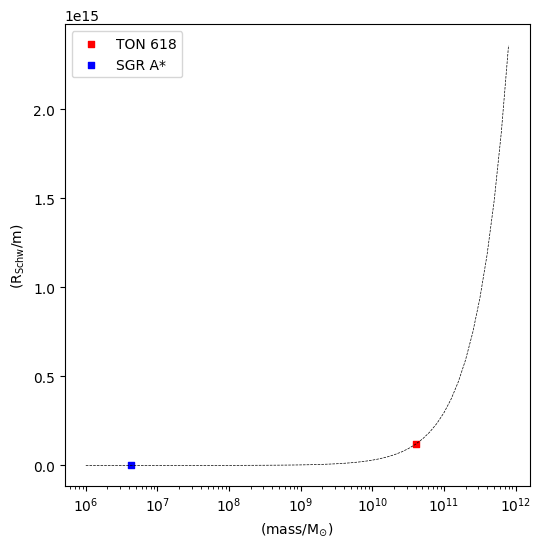

In [39]:
mass_range_log = np.arange(6, 12, 0.1)

mass_range = [10**item for item in mass_range_log]

radii = [schwartz(item).value for item in mass_range]

mass_TON = np.log10(4e10)
mass_SGR = np.log10(4.3e6)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(mass_range, radii, linestyle='dashed', color='k', linewidth=0.5)
ax.scatter(10**mass_TON, schwartz(10**mass_TON).value, color='red', marker='s', s=15, label='TON 618')
ax.scatter(10**mass_SGR, schwartz(10**mass_SGR).value, color='blue', marker='s', s=15, label='SGR A*')
ax.set_xlabel(r'$\mathrm{(mass/M_{\odot})}$')
ax.set_ylabel(r'$\mathrm{(R_{Schw}/m)}$')
ax.set_xscale('log')
ax.legend()

#### 2a: create a similar plot with density